 # Capstone Project - JamesMeans
 
 Today we will be taking a look at information provided from the California Census 1990

In [1]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
from sklearn import feature_selection as fs
from sklearn import metrics
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.anova import anova_lm
from sklearn.model_selection import KFold, cross_val_score
import scipy.stats as ss
import statsmodels.api as sm
import math
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
calhom = pd.read_csv('CaliHousing.csv')
calhom.columns = ['longitude', 'latitude', 'HousingMedianAge', 'TotalRooms', 'TotalBedrooms', 
               'Population', 'Households', 'MedianIncome', 'MedianHouseValue']


In [3]:
print(calhom.head)
calhom.describe()

<bound method NDFrame.head of        longitude  latitude  HousingMedianAge  TotalRooms  TotalBedrooms  \
0        -122.22     37.86                21        7099           1106   
1        -122.24     37.85                52        1467            190   
2        -122.25     37.85                52        1274            235   
3        -122.25     37.85                52        1627            280   
4        -122.25     37.85                52         919            213   
...          ...       ...               ...         ...            ...   
20634    -121.09     39.48                25        1665            374   
20635    -121.21     39.49                18         697            150   
20636    -121.22     39.43                17        2254            485   
20637    -121.32     39.43                18        1860            409   
20638    -121.24     39.37                16        2785            616   

       Population  Households  MedianIncome  MedianHouseValue  
0    

,longitude,latitude,HousingMedianAge,TotalRooms,TotalBedrooms,Population,Households,MedianIncome,MedianHouseValue
count,20639.000000,20639.000000,20639.000000,20639.000000,20639.000000,20639.000000,20639.000000,20639.000000,20639.000000
mean,-119.569576,35.631753,28.638888,2635.848152,537.917825,1425.530210,499.557779,3.870455,206843.910122
std,2.003495,2.135947,12.585568,2181.633870,421.248495,1132.463507,382.330173,1.899615,115385.731702
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1448.000000,295.500000,787.000000,280.000000,2.563100,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534700,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.742850,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
(calhom.astype(np.object) == '').any()

longitude           False
latitude            False
HousingMedianAge    False
TotalRooms          False
TotalBedrooms       False
Population          False
Households          False
MedianIncome        False
MedianHouseValue    False
dtype: bool

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'HousingMedianAge'}>],
       [<AxesSubplot:title={'center':'TotalRooms'}>,
        <AxesSubplot:title={'center':'TotalBedrooms'}>,
        <AxesSubplot:title={'center':'Population'}>],
       [<AxesSubplot:title={'center':'Households'}>,
        <AxesSubplot:title={'center':'MedianIncome'}>,
        <AxesSubplot:title={'center':'MedianHouseValue'}>]], dtype=object)

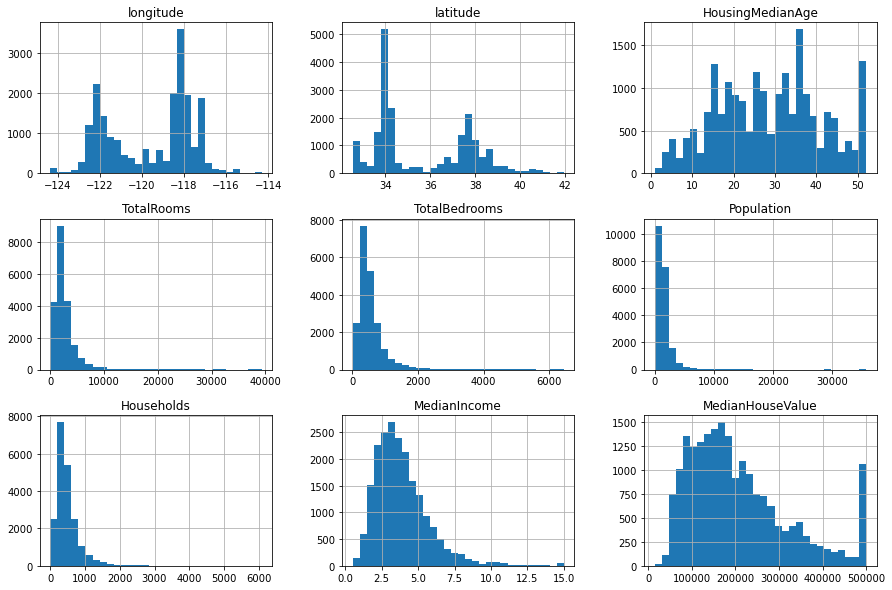

In [5]:
calhom.hist(bins=30, figsize=(15,10))

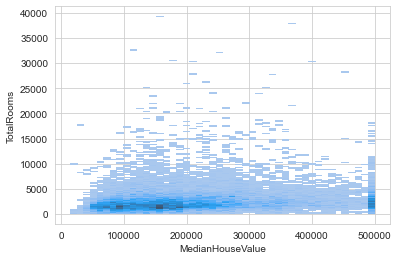

In [6]:
def hist_plot(calhom, cols, col_x = 'MedianHouseValue'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.histplot(x=col_x, y=col, data=calhom)
        plt.xlabel(col_x)
        plt.ylabel(col)
        plt.show()
        
num_cols = ['TotalRooms']
hist_plot(calhom, num_cols)

<AxesSubplot:xlabel='HousingMedianAge', ylabel='Count'>

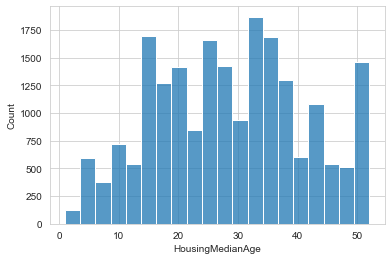

In [7]:
sns.histplot(calhom.HousingMedianAge, bins = 20)

In [49]:
def t_one_sample(samp, mu = 0.0, alpha = 0.1):
    '''Function for two-sided one-sample t test'''
    t_stat = stats.ttest_1samp(samp, mu)
    scale = np.std(samp)
    loc = np.mean(samp)
    ci = stats.t.cdf(alpha/2, len(samp), loc=mu, scale=scale)
    
    print('p-value      < %4.3e' % t_stat[1])
    print('Mean         = %4.3f' % loc)

In [9]:
corr = np.corrcoef(calhom['MedianHouseValue'], calhom['TotalRooms'])
print(corr)
corr=calhom.corr()
corr['MedianIncome'].sort_values(ascending=False)

[[1.         0.13425302]
 [0.13425302 1.        ]]


MedianIncome        1.000000
MedianHouseValue    0.688000
TotalRooms          0.198171
Households          0.013146
Population          0.004946
TotalBedrooms      -0.007984
longitude          -0.015028
latitude           -0.079941
HousingMedianAge   -0.119164
Name: MedianIncome, dtype: float64

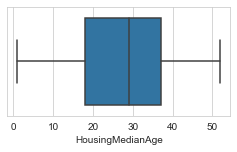

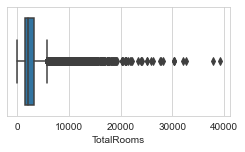

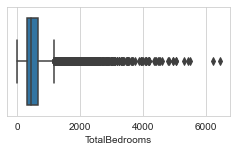

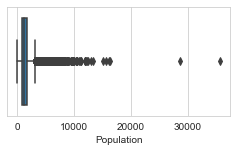

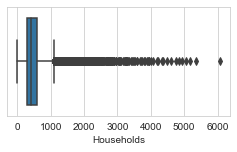

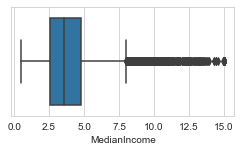

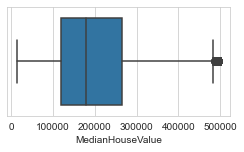

In [10]:
num_features= ['HousingMedianAge', 'TotalRooms', 'TotalBedrooms', 
'Population', 'Households', 'MedianIncome', 'MedianHouseValue']

for i in num_features:
    fig, ax = plt.subplots()
    fig.set_size_inches(4, 2)
    sns.boxplot(x=i, data=calhom,ax=ax)

### Correlation Between

In [11]:
corr_mat = calhom[['MedianIncome', 'MedianHouseValue']].corr()
corr_mat.iloc[1,0].round(3)

0.688

In [48]:
corr_mat = calhom[['TotalBedrooms', 'MedianHouseValue']].corr()
corr_mat.iloc[1,0].round(3)

0.08

When looking at Correlation between MedianIncome and MedianHouseValue it appear to be that there is a large correlation between the two variable meaning the higher the average income the more likely the home value will be higher

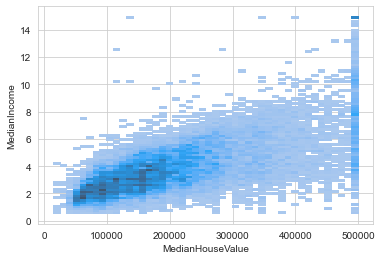

In [12]:
def hist_plot(calhom, cols, col_x = 'MedianHouseValue'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.histplot(x=col_x, y=col, data=calhom)
        plt.xlabel(col_x)
        plt.ylabel(col)
        plt.show()
        
num_cols = ['MedianIncome']
hist_plot(calhom, num_cols)

<AxesSubplot:xlabel='MedianHouseValue', ylabel='MedianIncome'>

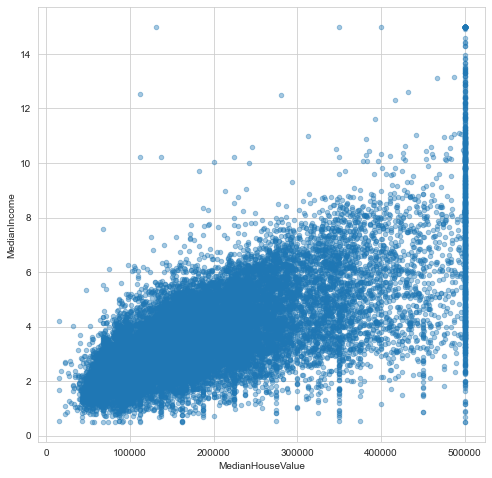

In [13]:
ax = plt.figure(figsize=(8, 8)).gca() # define axis
calhom.plot.scatter(x = 'MedianHouseValue', y = 'MedianIncome', ax = ax, alpha = 0.4)

In [14]:
from scipy import stats

def t_one_sample(samp, mu = 0.0, alpha = 0.1):
    
    '''Function for two-sided one-sample t test'''
    t_stat = stats.ttest_1samp(samp, mu)
    scale = np.std(samp)
    loc = np.mean(samp)
    ci = stats.t.cdf(alpha/2, len(samp), loc=mu, scale=scale)
    
    print('p-value      < %4.3e' % t_stat[1])
    print('Mean         = %4.3f' % loc)
    
t_one_sample(calhom.MedianHouseValue)    



p-value      < 0.000e+00
Mean         = 206843.910


<AxesSubplot:>

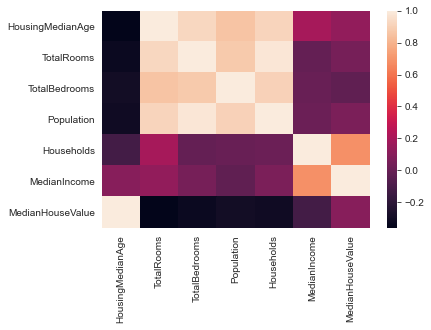

In [15]:
## Compute the correlation matrix
corrs = calhom.drop(['longitude', 'latitude'], axis = 1).corr()

## Create the hierarchical clustering model
dist = sch.distance.pdist(corrs)   # vector of pairwise distances using correlations
linkage = sch.linkage(dist, method='complete') # Compute the linkages for the clusters
ind = sch.fcluster(linkage, 0.5*dist.max(), 'distance')  # Apply the clustering algorithm

## Order the columns of the correlaton matrix according to the hierarchy
columns = [corrs.columns.tolist()[i] for i in list((np.argsort(ind)))]  # Order the names for the result
corrs_clustered = corrs.reindex(columns) ## Reindex the columns following the heirarchy 

## Plot a heat map of the clustered correlations
sns.heatmap(corrs_clustered, 
            xticklabels=corrs_clustered.columns.values,
            yticklabels=corrs_clustered.columns.values)

## Data Prep - Removing outliers

In [16]:
numeric_col = ['MedianHouseValue']
categorical_col = ['TotalRooms', 'TotalBedrooms', 
'Population', 'Households']


<AxesSubplot:>

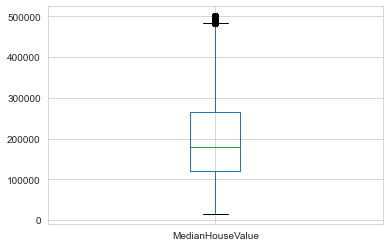

In [17]:
calhom.boxplot(numeric_col)

In [50]:
for x in ['MedianHouseValue']:
    q75,q25 = np.percentile(calhom.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    calhom.loc[calhom[x] < min,x] = np.nan
    calhom.loc[calhom[x] > max,x] = np.nan

In [51]:
calhom.isnull().sum()

longitude             0
latitude              0
HousingMedianAge      0
TotalRooms            0
TotalBedrooms         0
Population            0
Households            0
MedianIncome          0
MedianHouseValue    271
NiceHouse             0
dtype: int64

In [52]:
calhom = calhom.dropna(axis = 0)

In [53]:
calhom.isnull().sum()

longitude           0
latitude            0
HousingMedianAge    0
TotalRooms          0
TotalBedrooms       0
Population          0
Households          0
MedianIncome        0
MedianHouseValue    0
NiceHouse           0
dtype: int64

<AxesSubplot:>

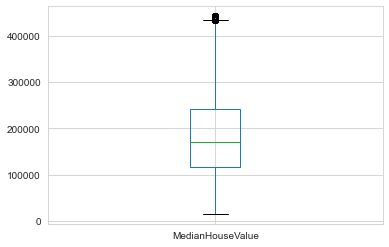

In [54]:
calhom.boxplot(['MedianHouseValue'])

In [23]:
def get_null_count(data):
    for i in data.columns:
        print(i, ': ', len(data[calhom[i].isnull()][i]))

In [24]:
get_null_count(calhom)

longitude :  0
latitude :  0
HousingMedianAge :  0
TotalRooms :  0
TotalBedrooms :  0
Population :  0
Households :  0
MedianIncome :  0
MedianHouseValue :  0


## Models

In [25]:
from scipy import stats
def t_one_sample(samp, mu = 0.0, alpha = 0.1):
    '''Function for two-sided one-sample t test'''
    t_stat = stats.ttest_1samp(samp, mu)
    scale = np.std(samp)
    loc = 28.44
    ci = stats.t.cdf(alpha/2, len(samp), loc=mu, scale=scale)
    print('Result of one-sample two-sided t test')
    print('Mean         = %4.3f' % loc)
    print('t-Statistic  = %4.3f' % t_stat[0])
    print('p-value      < %4.3e' % t_stat[1])
    print('On degrees of freedom = %4d' % (len(samp) - 1))
    print('Confidence Intervals for alpha =' + str(alpha))
    print('Lower =  %4.3f Upper = %4.3f' % (loc - ci, loc + ci))
    
t_one_sample(calhom.MedianHouseValue)    

Result of one-sample two-sided t test
Mean         = 28.440
t-Statistic  = 279.762
p-value      < 0.000e+00
On degrees of freedom = 19567
Confidence Intervals for alpha =0.1
Lower =  27.940 Upper = 28.940


In [26]:
from sklearn.base import BaseEstimator, TransformerMixin,RegressorMixin

class RemoveOutliers(BaseEstimator,TransformerMixin):
   
    def fit (self,x,y=None):
        return self
    def transform(self,X,y=None):
        X=X[(X['MedianHouseValue']!= 500001) | (X['MedianIncome']>=2)].reset_index(drop=True)
        X=X[X['MedianHouseValue']<=11].reset_index(drop=True)
        X=X[(X['MedianHouseValue']!= 350000 )| (X['MedianIncome']>=1.5)].reset_index(drop=True)
        X=X[(X['MedianHouseValue']!= 450000) | (X['MedianIncome']>=2)].reset_index(drop=True)
        X=X[(X['MedianHouseValue']!= 350000) | (X['MedianIncome']<9.5)].reset_index(drop=True)
        X=X[(X['MedianHouseValue']<= 9000 )]
        
        return X

In [27]:
calhom1=RemoveOutliers().fit_transform(calhom)

In [28]:
def get_null_count(data):
    for i in data.columns:
        print(i, ': ', len(data[calhom[i].isnull()][i]))

In [29]:
get_null_count(calhom)

longitude :  0
latitude :  0
HousingMedianAge :  0
TotalRooms :  0
TotalBedrooms :  0
Population :  0
Households :  0
MedianIncome :  0
MedianHouseValue :  0


In [30]:
def r_z(r): ## transform distribution
    return math.log((1 + r) / (1 - r)) / 2.0

def z_r(z): ## inverse transform distribution 
    e = math.exp(2 * z)
    return((e - 1) / (e + 1))

def r_conf_int(r, alpha, n):
    # Transform r to z space
    z = r_z(r)
    # Compute standard error and critcal value in z
    se = 1.0 / math.sqrt(n - 3)
    z_crit = ss.norm.ppf(1 - alpha/2)

    ## Compute CIs with transform to r
    lo = z_r(z - z_crit * se)
    hi = z_r(z + z_crit * se)
    return (lo, hi)

def correlation_sig(df, col1, col2):
    pearson_cor = ss.pearsonr(x = df[col1], y = calhom[col2])
    conf_ints = r_conf_int(pearson_cor[0], 0.05, 1000)
    print('Correlation = %4.3f with CI of %4.3f to %4.3f and p_value %4.3e' 
        % (pearson_cor[0], conf_ints[0], conf_ints[1], pearson_cor[1]))
    
correlation_sig(calhom, 'MedianIncome', 'MedianHouseValue')    

Correlation = 0.644 with CI of 0.606 to 0.679 and p_value 0.000e+00


# Models

####  Regression

In [31]:
predictors = sm.add_constant(calhom.MedianHouseValue, prepend = False)

lm_mod = sm.OLS(calhom.MedianIncome, predictors)
res = lm_mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:           MedianIncome   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                 1.387e+04
Date:                Thu, 02 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:33:26   Log-Likelihood:                -31193.
No. Observations:               19568   AIC:                         6.239e+04
Df Residuals:                   19566   BIC:                         6.241e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
MedianHouseValue  1.051e-05   8.93e-08  

  # Experiment 

In [32]:
calhom[['HousingMedianAge', 'TotalRooms', 'TotalBedrooms', 
'Population', 'Households', 'MedianIncome', 'MedianHouseValue']].corr().round(3)

,HousingMedianAge,TotalRooms,TotalBedrooms,Population,Households,MedianIncome,MedianHouseValue
HousingMedianAge,1.000,-0.373,-0.328,-0.295,-0.310,-0.198,0.061
TotalRooms,-0.373,1.000,0.934,0.860,0.921,0.227,0.148
TotalBedrooms,-0.328,0.934,1.000,0.880,0.979,0.025,0.080
Population,-0.295,0.860,0.880,1.000,0.909,0.046,0.018
Households,-0.310,0.921,0.979,0.909,1.000,0.049,0.100
MedianIncome,-0.198,0.227,0.025,0.046,0.049,1.000,0.644
MedianHouseValue,0.061,0.148,0.080,0.018,0.100,0.644,1.000


In [33]:
calhom['NiceHouse'] = calhom[['HousingMedianAge', 'TotalRooms', 'TotalBedrooms', 
'Population', 'MedianHouseValue']].apply(np.mean, axis = 1)
calhom.head()

<ipython-input-33-a03ae3d95e27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calhom['NiceHouse'] = calhom[['HousingMedianAge', 'TotalRooms', 'TotalBedrooms',


,longitude,latitude,HousingMedianAge,TotalRooms,TotalBedrooms,Population,Households,MedianIncome,MedianHouseValue,NiceHouse
0,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500.0,73825.4
1,-122.24,37.85,52,1467,190,496,177,7.2574,352100.0,70861.0
2,-122.25,37.85,52,1274,235,558,219,5.6431,341300.0,68683.8
3,-122.25,37.85,52,1627,280,565,259,3.8462,342200.0,68944.8
4,-122.25,37.85,52,919,213,413,193,4.0368,269700.0,54259.4


Mean of NiceHouse = 39094.021862223955
STD of NiceHouse = 19173.03609349726


Text(0.5, 0, 'NiceHouse')

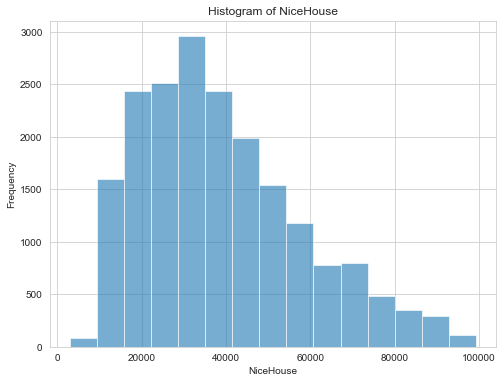

In [34]:
print('Mean of NiceHouse = ' + str(np.mean(calhom.NiceHouse)))
print('STD of NiceHouse = ' + str(np.std(calhom.NiceHouse)))

## Plot a histogram
ax = plt.figure(figsize=(8, 6)).gca() # define axis
calhom.NiceHouse.plot.hist(ax = ax, alpha = 0.6, bins = 15)
plt.title('Histogram of NiceHouse')
plt.xlabel('NiceHouse')

# Closing Remarks 

Here we took an interesting look at data that was provided from the 1990 California Census, through visualization and examination of data that was presented. Looking at the general concentraion of data accross several points of data. Using many different libraries to manipulate the information from the data set. 

Noting the concentraion of home values and alloted rooms, to see a trend between Value and Rooms, exploring the overall age for housing and their age. Some of the data was previously combined with other metrics which caused some problems in the data when trying to parse out the information if the data set could have been split further. Along with for instance the property tax rate for buildings to help determine what he pool of public funding for a district or region would be. 
